In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import scipy.stats as stats

from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from statsmodels.stats.diagnostic import normal_ad

In [2]:
df = pd.read_csv("Задания/Datasets/euroweight.dat.txt", delim_whitespace=True, header=None, on_bad_lines='skip')
df.columns = ['CaseNumber', 'Weight', 'NumberOfPackage']
print(df.shape)
df.head(20)

(2000, 3)


/var/folders/19/c1rn4t0n4qn2h0cjhj9f9_3r0000gn/T/ipykernel_64914/3392309208.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("Задания/Datasets/euroweight.dat.txt", delim_whitespace=True, header=None, on_bad_lines='skip')


,CaseNumber,Weight,NumberOfPackage
0,1,7.512,1
1,2,7.502,1
2,3,7.461,1
3,4,7.562,1
4,5,7.528,1
5,6,7.459,1
6,7,7.518,1
7,8,7.537,1
8,9,7.517,1
9,10,7.605,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CaseNumber       2000 non-null   int64  
 1   Weight           2000 non-null   float64
 2   NumberOfPackage  2000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 47.0 KB


In [4]:
data = df.copy()
df.isnull().sum()

CaseNumber         0
Weight             0
NumberOfPackage    0
dtype: int64

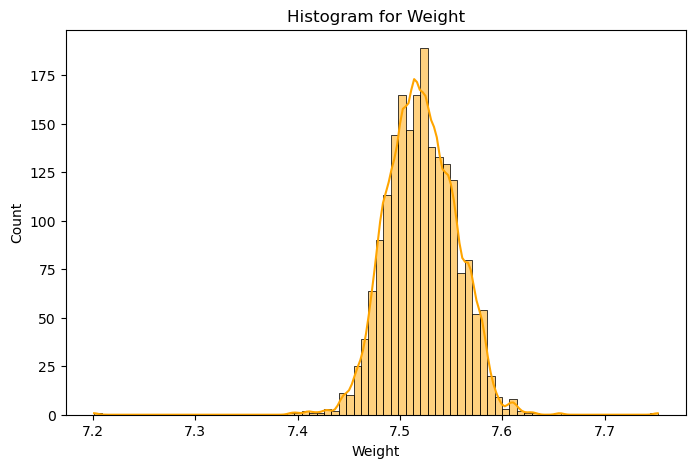

In [5]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Weight'], kde=True, color='orange', kde_kws={'bw_adjust': 0.5})  
# kde=True adds a density line
# bw_adjust adjusts the level of smoothing for the KDE
plt.title('Histogram for Weight')
plt.show()

In [6]:
# Shapiro-Wilk
stat, p = stats.shapiro(df['Weight'])
print('Shapiro-Wilk:')
print('Statistic:', stat, 'p-value:', p)
if p < 0.05:
    print("There is no normal distribution")
if p > 0.05:
    print("There is a normal distribution")

Shapiro-Wilk:
Statistic: 0.9754729009998673 p-value: 5.0232770717677785e-18
There is no normal distribution


    Гипотеза о нормальном  распределении выполняется для общей кучи

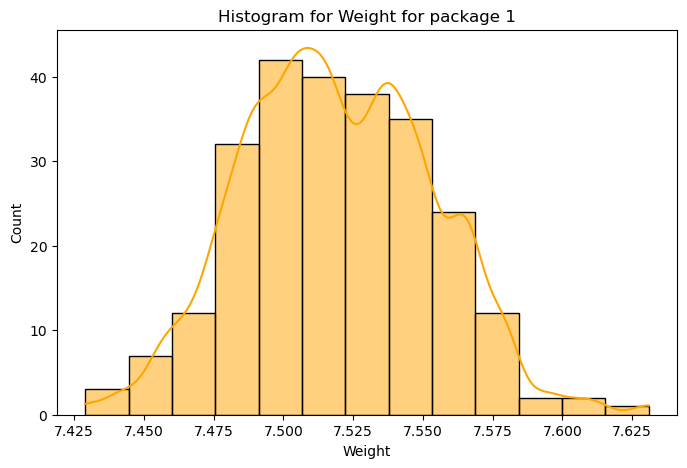

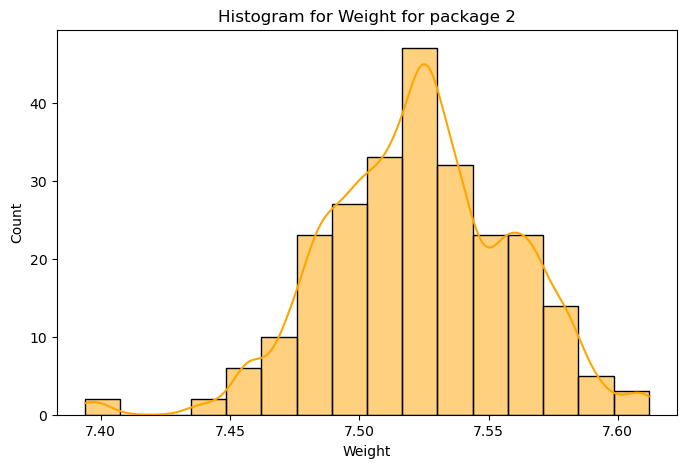

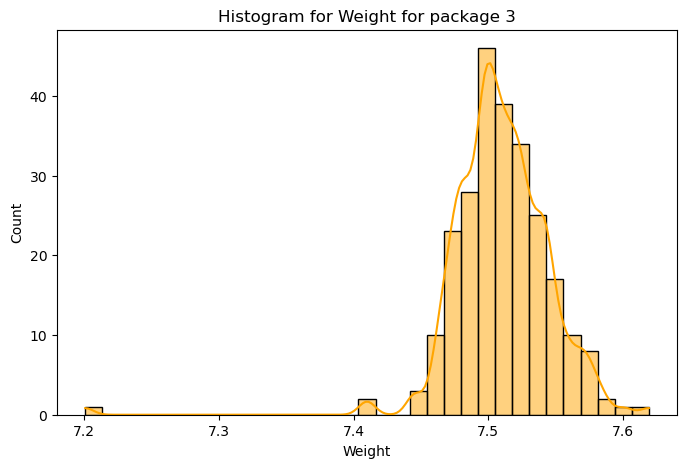

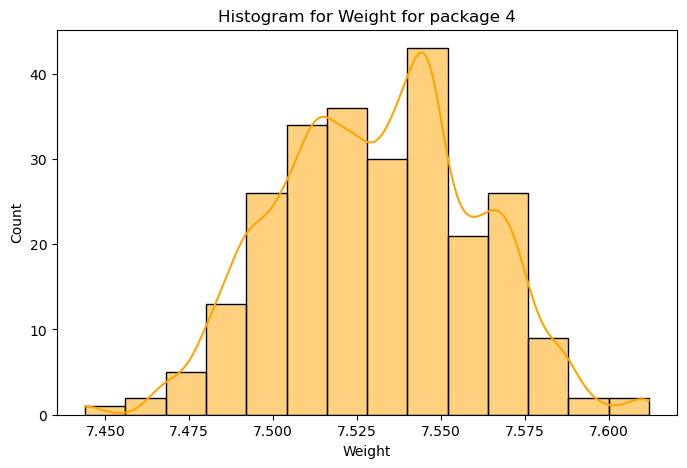

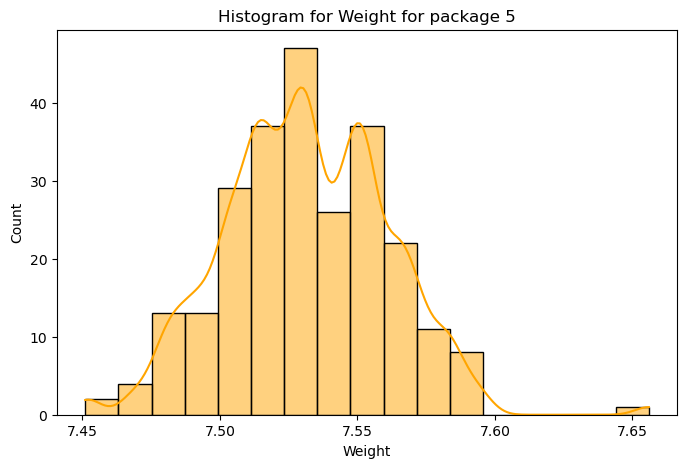

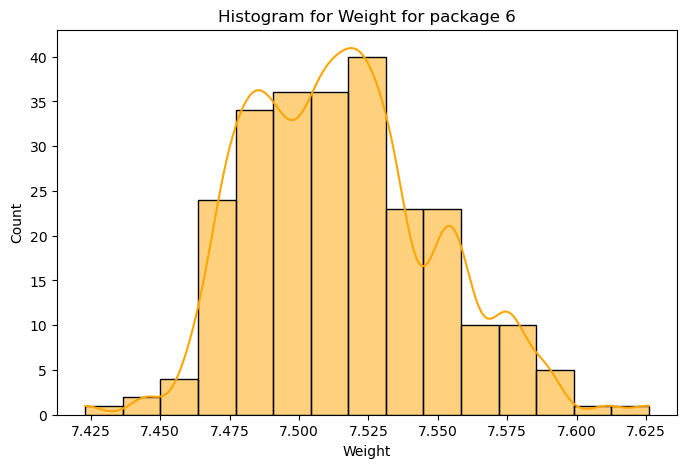

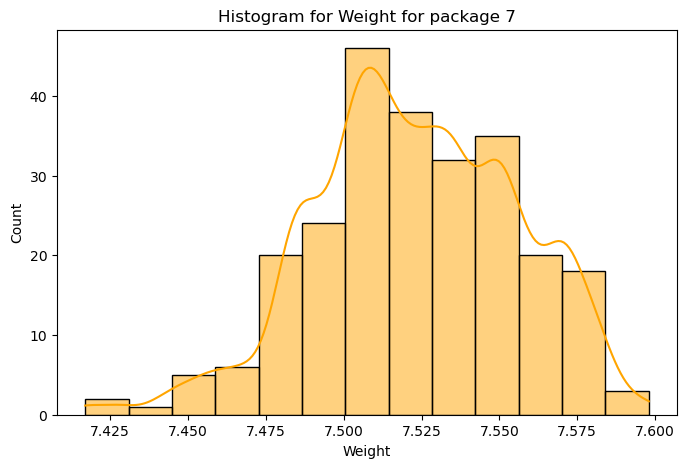

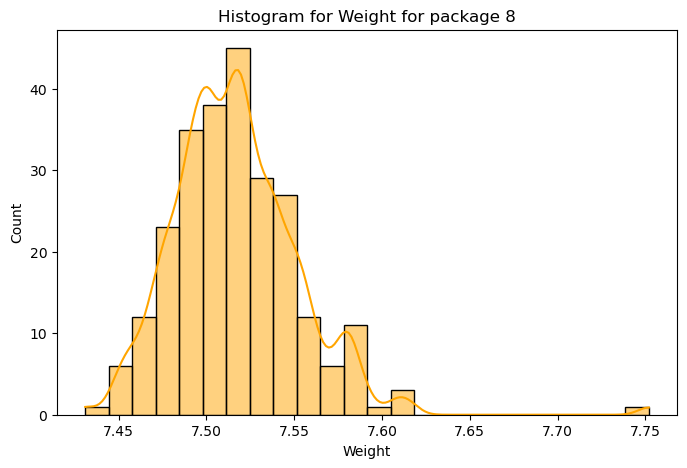

In [7]:
for i in range(1, 9):
    subdata = df[df['NumberOfPackage'] == i]
    plt.figure(figsize=(8, 5))
    sns.histplot(subdata['Weight'], kde=True, color='orange', kde_kws={'bw_adjust': 0.5})  
    # kde=True adds a density line
    # bw_adjust adjusts the level of smoothing for the KDE
    plt.title(f'Histogram for Weight for package {i}')
    plt.show()

In [8]:
for i in range(1, 9):
    subdata = df[df['NumberOfPackage'] == i]
    # Shapiro-Wilk
    stat, p = stats.shapiro(subdata['Weight'])
    print(f"Shapiro-Wilk for Pack {i}:")
    print('Statistic:', stat, 'p-value:', p)
    if p < 0.05:
        print("No normal distribution")
    if p > 0.05:
        print("There is a normal distribution")

Shapiro-Wilk for Pack 1:
Statistic: 0.9955065633661131 p-value: 0.6830016984325032
There is a normal distribution
Shapiro-Wilk for Pack 2:
Statistic: 0.9909000904488605 p-value: 0.12187697982854381
There is a normal distribution
Shapiro-Wilk for Pack 3:
Statistic: 0.8634321390915005 p-value: 4.0894442659130386e-14
No normal distribution
Shapiro-Wilk for Pack 4:
Statistic: 0.9955047033510325 p-value: 0.6826586479147758
There is a normal distribution
Shapiro-Wilk for Pack 5:
Statistic: 0.9910339934809614 p-value: 0.12899280195551283
There is a normal distribution
Shapiro-Wilk for Pack 6:
Statistic: 0.9840594568487767 p-value: 0.006756498703670199
No normal distribution
Shapiro-Wilk for Pack 7:
Statistic: 0.9907008441292615 p-value: 0.1119834333901041
There is a normal distribution
Shapiro-Wilk for Pack 8:
Statistic: 0.9367201394772204 p-value: 6.82769744861544e-09
No normal distribution


In [9]:
# Extracting weight data
data = df['Weight']

# Calculating mean and standard deviation
mean = np.mean(data)
std_dev = np.std(data, ddof=1)  # Using ddof=1 for sample standard deviation
n = len(data)

# Confidence level
confidence_level = 0.95
alpha = 1 - confidence_level

# Determining the critical value (z-value for normal distribution)
z_critical = stats.norm.ppf(1 - alpha / 2)

# Calculating standard error
standard_error = std_dev / np.sqrt(n)

# Calculating confidence intervals
margin_of_error = z_critical * standard_error

# Confidence interval for the mean
confidence_interval = (mean - margin_of_error, mean + margin_of_error)

# Determining critical chi-squared values
chi2_lower = stats.chi2.ppf(alpha / 2, df=n - 1)
chi2_upper = stats.chi2.ppf(1 - alpha / 2, df=n - 1)

# Calculating confidence intervals for standard deviation
lower_bound = np.sqrt((n - 1) * std_dev**2 / chi2_upper)
upper_bound = np.sqrt((n - 1) * std_dev**2 / chi2_lower)

print(f"Confidence interval for standard deviation: ({lower_bound:.2f}, {upper_bound:.2f})")
print(f"Confidence interval for mean: {confidence_interval[0]:.2f} - {confidence_interval[1]:.2f}")

Confidence interval for standard deviation: (0.03, 0.04)
Confidence interval for mean: 7.52 - 7.52
